In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_test)

10000

In [4]:
len(x_train)

60000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

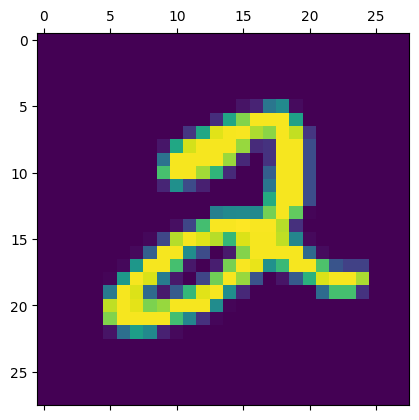

In [7]:
plt.matshow(x_train[5])

In [8]:
y_train[5]

2

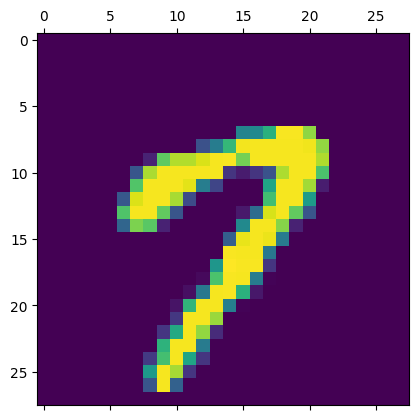

In [9]:
plt.matshow(x_train[15])

In [10]:
y_train[15]

7

In [11]:
x_train.shape


(60000, 28, 28)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0].shape

(28, 28)

In [14]:
x_train_flattened = x_train.reshape(60000,28*28)

In [15]:
x_train_flattened.shape

(60000, 784)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
x_test_flattened = x_test.reshape(10000,28*28)


In [18]:
x_test_flattened.shape

(10000, 784)

In [19]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4710 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9256


In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9271


[0.26493337750434875, 0.9271000027656555]

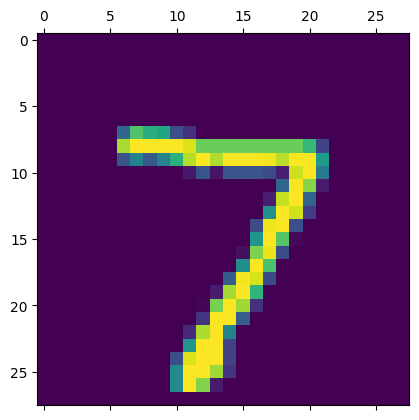

In [22]:
plt.matshow(x_test[0])

In [23]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [24]:
y_predicted[0]

array([1.7539745e-02, 2.8500259e-07, 6.7819066e-02, 9.4982284e-01,
       2.2096373e-03, 8.9443460e-02, 1.2987603e-06, 9.9975818e-01,
       7.7280715e-02, 7.0691007e-01], dtype=float32)

In [25]:
np.argmax(y_predicted[0])

7

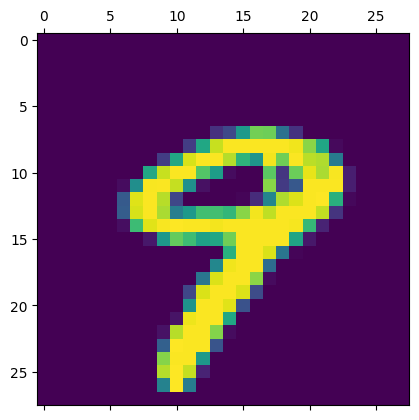

In [26]:
plt.matshow(x_test[9])

In [27]:
np.argmax(y_predicted[9])

9

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [29]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    2,    1,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    7,  948,   13,    8,    3,   13,    9,   22,    5],
       [   4,    0,   26,  916,    0,   23,    2,   10,   14,   15],
       [   1,    1,    3,    1,  908,    0,   12,    4,    9,   43],
       [  11,    3,    4,   29,   10,  779,   15,    7,   25,    9],
       [  10,    3,    6,    1,    7,   12,  916,    2,    1,    0],
       [   1,    5,   24,    7,    7,    0,    0,  942,    2,   40],
       [   9,    9,   10,   22,    9,   29,   10,   12,  846,   18],
       [  10,    6,    2,    8,   18,    7,    0,   16,    5,  937]])>

Text(95.72222222222221, 0.5, 'Truth')

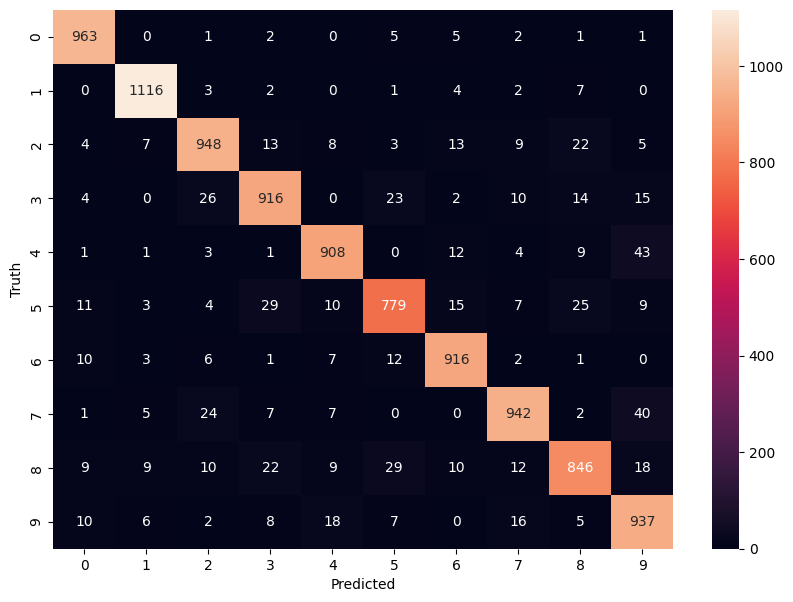

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2749 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1199 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0843 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9847


In [34]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9753


[0.07847122848033905, 0.9753000140190125]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

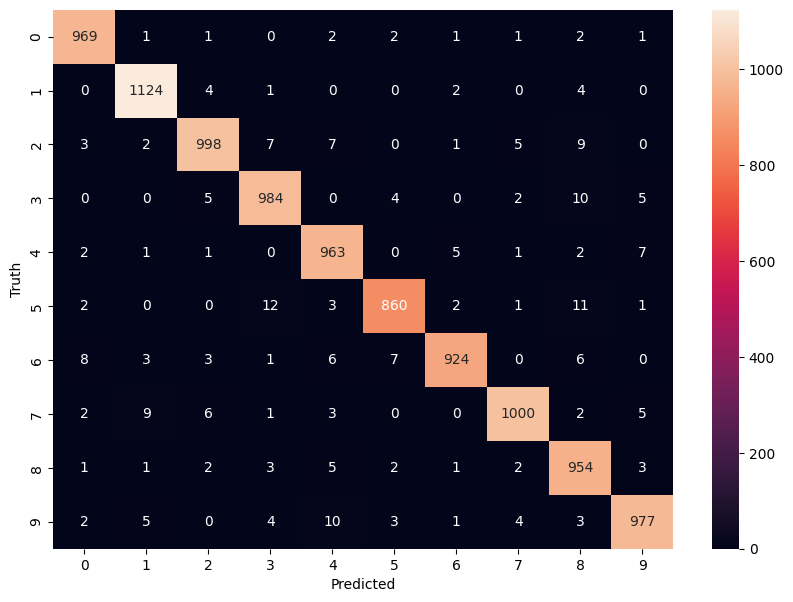

In [35]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
import cv2
input_image_path = input('Enter image path')
input_image = cv2.imread(input_image_path)

Enter image path MNIST_digit.png


In [37]:
input_image.shape

(318, 318, 3)

In [38]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)


grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize.shape
arr= np.array([input_image_resize])
arr.shape

(1, 28, 28)

In [39]:
input_image_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

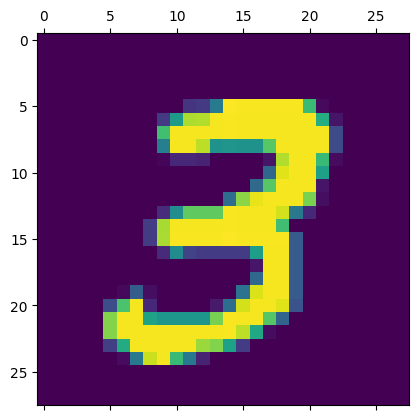

In [40]:

plt.matshow(input_image_resize)

In [41]:
arr =arr/255.0
arr[0].shape
arr[0]
arr.shape

(1, 28, 28)

In [42]:
image_reshaped = arr.reshape(1,28*28)
image_reshaped.shape

(1, 784)

In [44]:

input_prediction  = model.predict(image_reshaped)
print(input_prediction[0])


1/1 [==============================] - 0s 30ms/step
[1.3690471e-06 3.6988611e-05 1.3066747e-03 9.9999517e-01 4.9923038e-10
 1.6622365e-04 2.6117202e-14 2.0213870e-04 7.0336446e-02 1.2636556e-01]


In [45]:
np.argmax(input_prediction[0])

3